## **Hourly EDA**

Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Load Dataset

In [31]:
df=pd.read_csv('/content/hourly_merged.csv')

In [32]:
df.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 0:00,81,20,0.333333,373
1,1503960366,4/12/2016 1:00,61,8,0.133333,160
2,1503960366,4/12/2016 2:00,59,7,0.116667,151
3,1503960366,4/12/2016 3:00,47,0,0.000000,0
4,1503960366,4/12/2016 4:00,48,0,0.000000,0


In [33]:
df

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 0:00,81,20,0.333333,373
1,1503960366,4/12/2016 1:00,61,8,0.133333,160
2,1503960366,4/12/2016 2:00,59,7,0.116667,151
3,1503960366,4/12/2016 3:00,47,0,0.000000,0
4,1503960366,4/12/2016 4:00,48,0,0.000000,0
...,...,...,...,...,...,...
22094,8877689391,5/12/2016 10:00,126,12,0.200000,514
22095,8877689391,5/12/2016 11:00,192,29,0.483333,1407
22096,8877689391,5/12/2016 12:00,321,93,1.550000,3135
22097,8877689391,5/12/2016 13:00,101,6,0.100000,307


In [34]:
df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   StepTotal         22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ MB


In [37]:
df.columns

Index(['Id', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal'],
      dtype='object')

In [38]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


Shape of the dataset: (22099, 6)

Data types of each column:
Id                    int64
ActivityHour         object
Calories              int64
TotalIntensity        int64
AverageIntensity    float64
StepTotal             int64
dtype: object

First few rows of the dataset:
           Id    ActivityHour  Calories  TotalIntensity  AverageIntensity  \
0  1503960366  4/12/2016 0:00        81              20          0.333333   
1  1503960366  4/12/2016 1:00        61               8          0.133333   
2  1503960366  4/12/2016 2:00        59               7          0.116667   
3  1503960366  4/12/2016 3:00        47               0          0.000000   
4  1503960366  4/12/2016 4:00        48               0          0.000000   

   StepTotal  
0        373  
1        160  
2        151  
3          0  
4          0  


# **Data Visualization**

**Bar Plot:**

 To visualize top 10 users based on the maximum Calories intake in a single day. The provided dataset contains information about users' activities, including their ID, activityhour, and Calories covered. By aggregating this data and visualizing it using a bar plot,I was able to identify the users who have achieved the highest maximum Calories covered in a single day.Based on data it seems user 8877689391 has coverd maximum Calories.

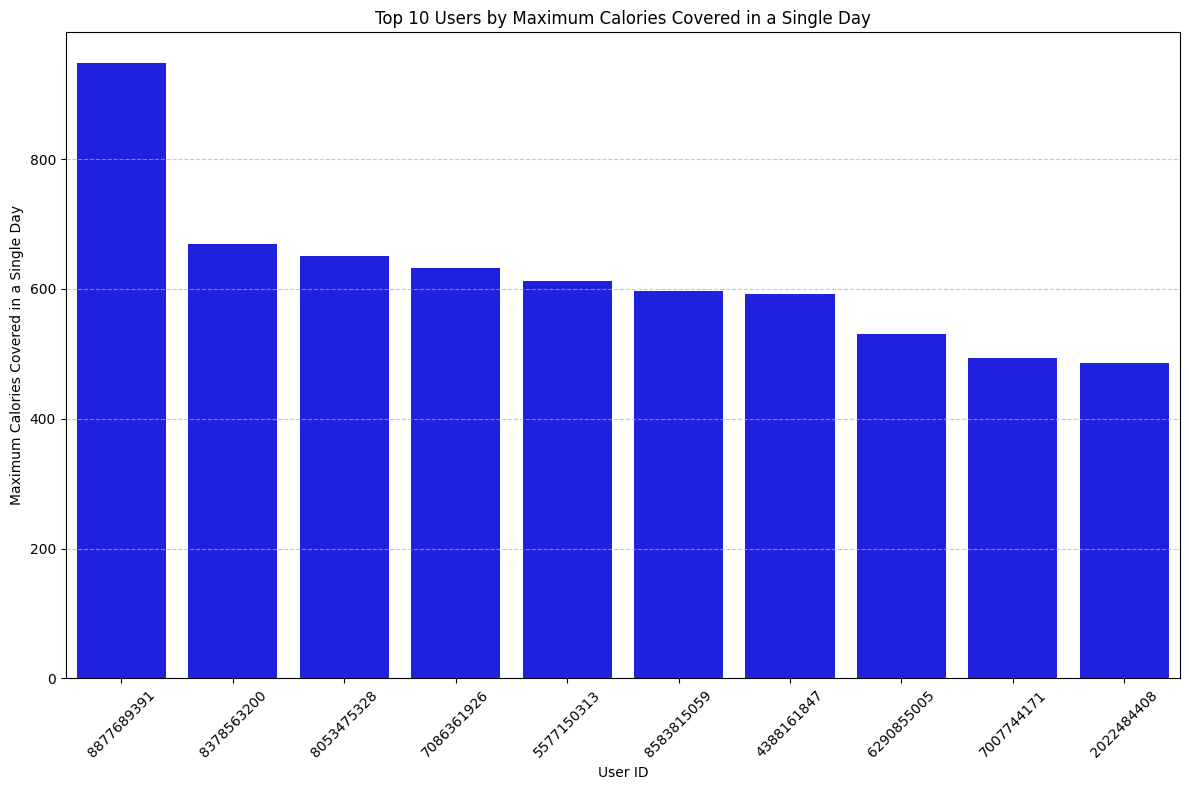

In [39]:
# Aggregating data by user ID and activity hour to compute total calories traveled
daily_distance = df.groupby(['Id', 'ActivityHour'])['Calories'].sum().reset_index()
max_dist_per_day = daily_distance.groupby('Id')['Calories'].max().reset_index()
top_10_users = max_dist_per_day.sort_values(by='Calories', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_users, x='Id', y='Calories', color='blue', order=top_10_users['Id'])
plt.title('Top 10 Users by Maximum Calories Covered in a Single Day')
plt.xlabel('User ID')
plt.ylabel('Maximum Calories Covered in a Single Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To visualize top 10 users based on the maximum StepTotal intake in a single day. The provided dataset contains information about users' activities, including their ID, activityhour, and StepTotal covered. By aggregating this data and visualizing it using a bar plot,I was able to identify the users who have achieved the highest maximum StepTotal covered in a single day.Based on data it seems user 8877689391 has coverd maximum StepTotal.

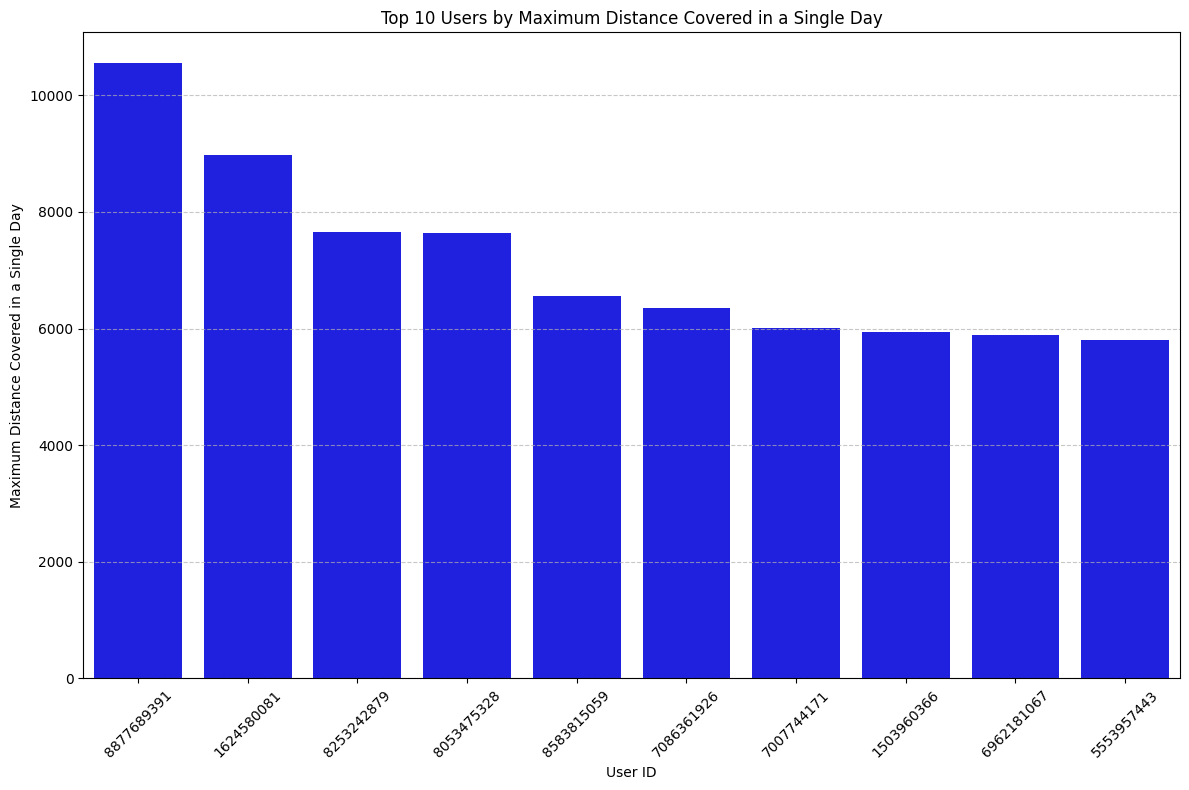

In [40]:
# Aggregating data by user ID and activity hour to compute total distance traveled
daily_distance = df.groupby(['Id', 'ActivityHour'])['StepTotal'].sum().reset_index()

# Determining the peak distance achieved by each user within a day
max_dist_per_day = daily_distance.groupby('Id')['StepTotal'].max().reset_index()
top_10_users = max_dist_per_day.sort_values(by='StepTotal', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_users, x='Id', y='StepTotal', color='blue', order=top_10_users['Id'])
plt.title('Top 10 Users by Maximum Distance Covered in a Single Day')
plt.xlabel('User ID')
plt.ylabel('Maximum Distance Covered in a Single Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Heatmap**:

A correlation heatmap is generated to visualize the pairwise correlations between selected activity-related metrics within the dataset. The heatmap represents the correlation coefficients between variables, with higher values indicating stronger correlations.

Variables included in the heatmap:

ActivityHour: Time of activity
Calories: Number of calories burned
TotalIntensity: Overall intensity of activity
AverageIntensity: Average intensity of activity
StepTotal: Total number of steps taken

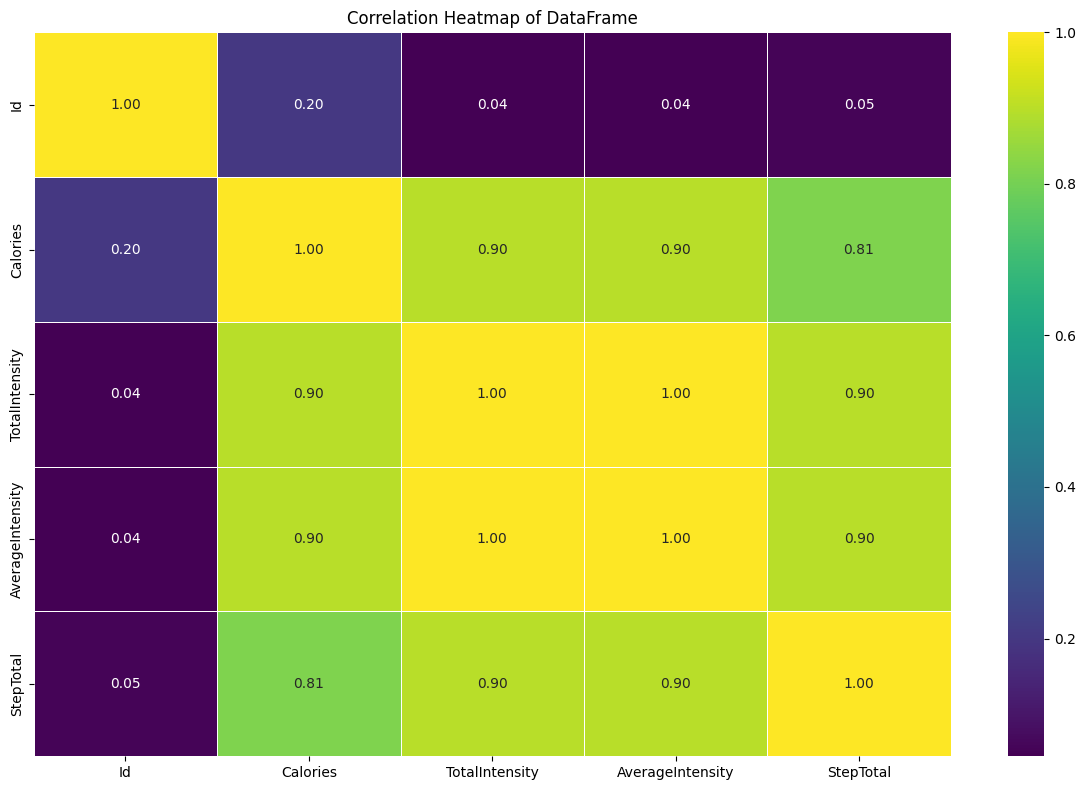

In [41]:
heatmap = df[['Id', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal']]
correlation_matrix = heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.7)
plt.title('Correlation Heatmap of DataFrame')
plt.tight_layout()
plt.show()

**Scatter Plot**:

Three scatter plots are generated to visualize relationships between various activity-related metrics:

**Calories vs. Activity Hour**: This scatter plot depicts the relationship between the time of activity (Activity Hour) and the number of calories burned (Calories). Each point represents a data instance, with the color indicating different data points.

**Calories vs. Average Intensity**: This scatter plot illustrates the correlation between the average intensity of activity (Average Intensity) and the number of calories burned (Calories). The intensity of activity is represented on the x-axis, and calories burned are on the y-axis.

**Step Total vs. Total Intensity**: This scatter plot displays the association between the total number of steps taken (Step Total) and the overall intensity of activity (Total Intensity). Each point in the plot corresponds to a data instance, with the color denoting different data points.

These scatter plots provide visual insights into the relationships between activity metrics, aiding in understanding patterns and correlations within the dataset.



In [42]:
scatter_plot_1 = px.scatter(df, x='ActivityHour', y='Calories',
                  title='Scatter Plot: Calories',
                  labels={'ActivityHour': 'ActivityHour', 'Calories': 'Calories'},
                  color_discrete_sequence=['blue'])
scatter_plot_1.show()


In [43]:
scatter_plot_1 = px.scatter(df, x='AverageIntensity', y='Calories',
                  title='Scatter Plot: AverageIntensity vs Calories',
                  labels={'AverageIntensity': 'AverageIntensity', 'Calories': 'Calories'},
                  color_discrete_sequence=['blue'])
scatter_plot_1.show()


In [44]:
scatter_plot_1 = px.scatter(df, x='StepTotal', y='TotalIntensity',
                  title='Scatter Plot: StepTotal vs TotalIntensity',
                  labels={'StepTotal': 'StepTotal', 'TotalIntensity': 'TotalIntensity'},
                  color_discrete_sequence=['red'])
scatter_plot_1.show()


**Histogram**

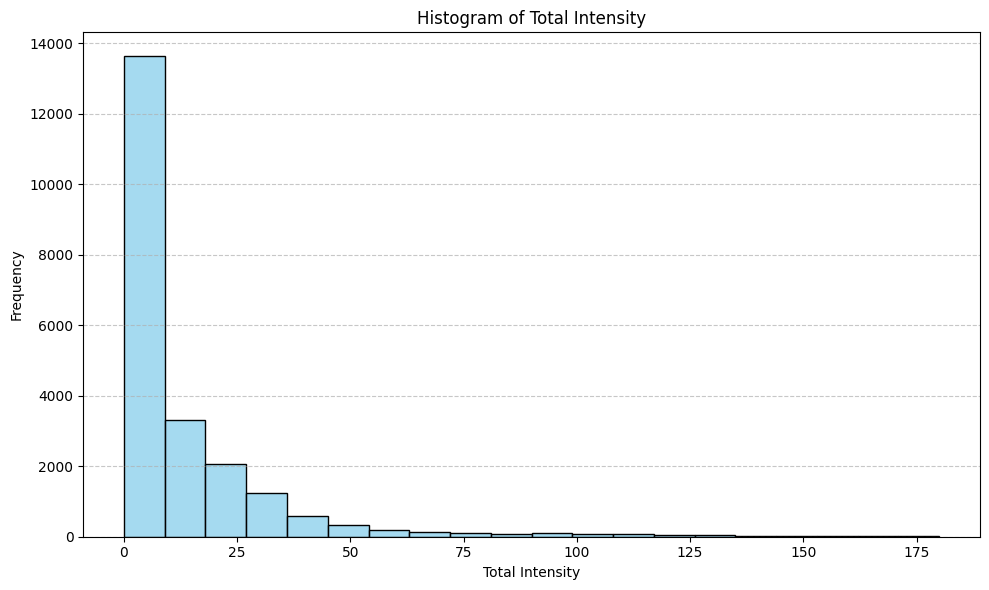

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalIntensity', bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Intensity')
plt.xlabel('Total Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [46]:
df.columns

Index(['Id', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal'],
      dtype='object')

**Pairplot**

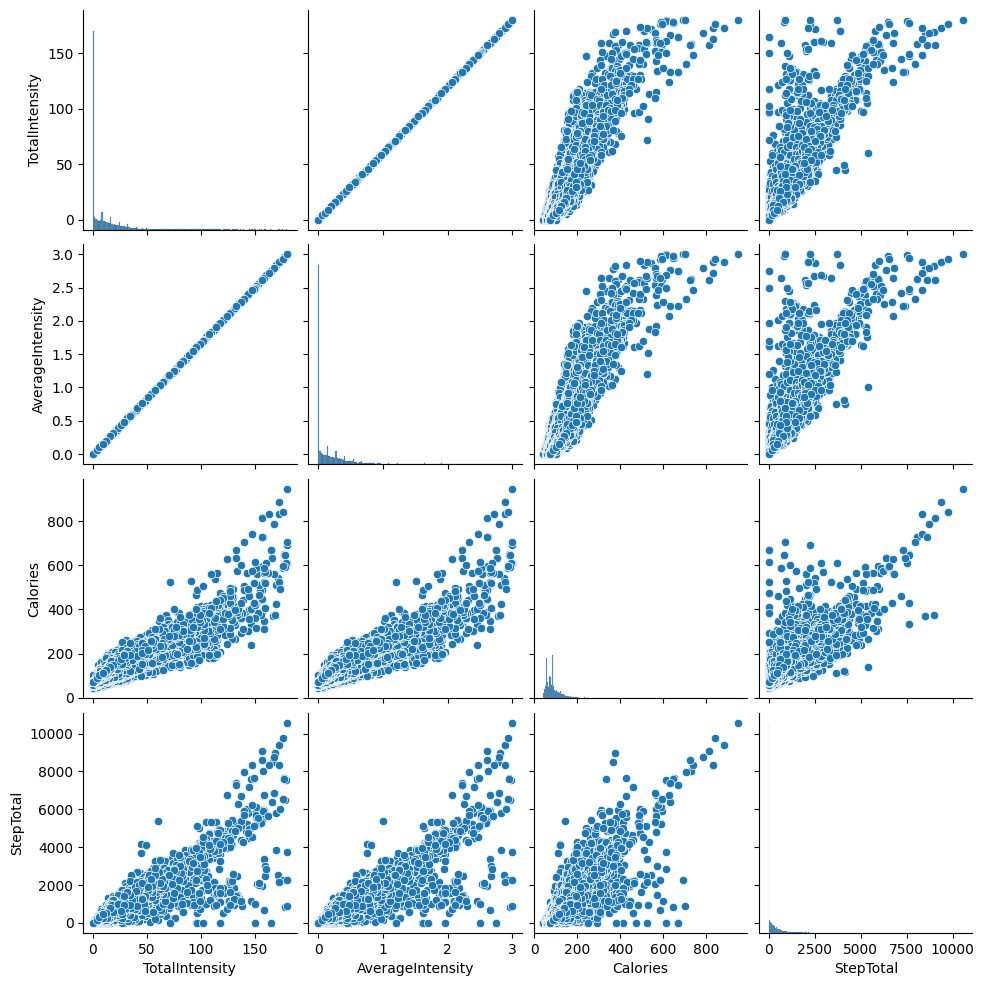

In [47]:
Pairplot = ['TotalIntensity', 'AverageIntensity', 'Calories','StepTotal']
sns.pairplot(df[Pairplot])
plt.show()